<a href="https://colab.research.google.com/github/JasimAdam/githubtest/blob/main/Group12_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#First 5 rows
df = pd.read_csv('redfin_housing.csv')
df.head()

,Price (USD),Address,City,Date,Beds,Baths,Area (SQFT)
0,875000.0,"6905 Yolanda Ave, Reseda, CA 91335",Los-Angeles,2023-12-15,2.0,2.0,1343.0
1,750000.0,"4821 Bakman Ave #304, North Hollywood, CA 91601",Los-Angeles,2023-12-15,3.0,2.5,1454.0
2,1699000.0,"3126 Verdugo Pl, Los Angeles, CA 90065",Los-Angeles,2023-12-15,4.0,2.0,2085.0
3,460000.0,"15050 Victory Blvd #103, Van Nuys, CA 91411",Los-Angeles,2023-12-15,2.0,2.0,1193.0
4,857000.0,"2043 W 65th Pl, Los Angeles, CA 90047",Los-Angeles,2023-12-15,3.0,2.0,1635.0


In [ ]:
#Duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
#Null values
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 Price (USD)    27
Address         0
City            0
Date            0
Beds            5
Baths          12
Area (SQFT)     0
dtype: int64


In [ ]:
df = df.dropna()

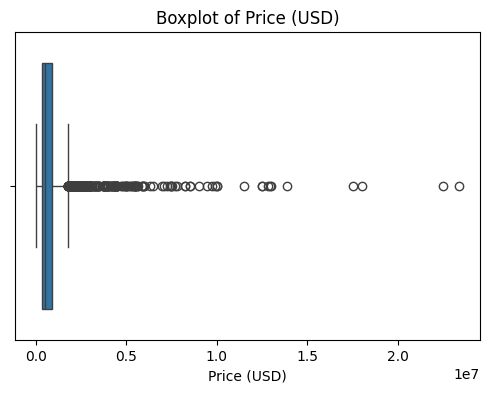

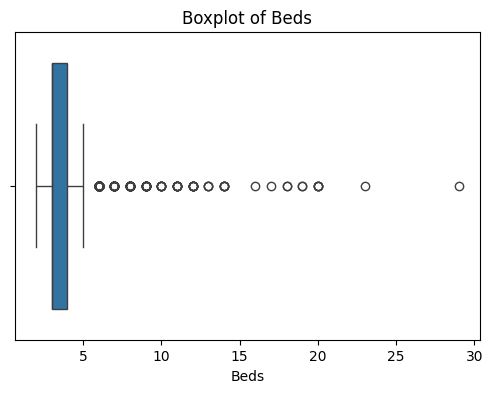

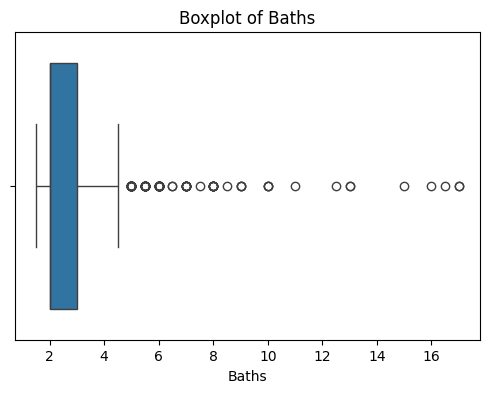

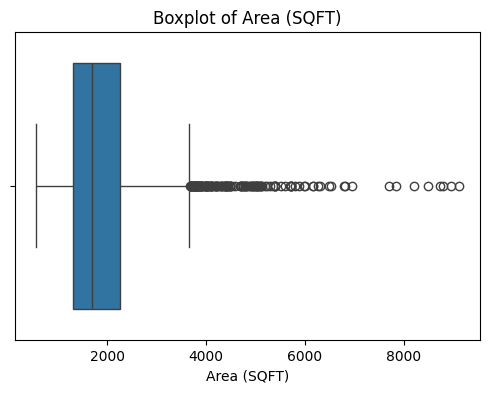

In [ ]:
# Visualize outliers
numerical_cols = ['Price (USD)', 'Beds', 'Baths', 'Area (SQFT)']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in numerical_cols:
    df = remove_outliers_iqr(df, col)


In [ ]:
#Check for zero values
print((df[['Beds', 'Baths', 'Area (SQFT)']] == 0).sum())


Beds           0
Baths          0
Area (SQFT)    0
dtype: int64


In [ ]:
#Check for negative vlaues

negatives = df[['Beds', 'Baths', 'Area (SQFT)', 'Price (USD)']] < 0
print("Negative values:\n", negatives.sum())

Negative values:
 Beds           0
Baths          0
Area (SQFT)    0
Price (USD)    0
dtype: int64


In [ ]:
#Value types
print(df.dtypes)

Price (USD)    float64
Address         object
City            object
Date            object
Beds           float64
Baths          float64
Area (SQFT)    float64
dtype: object


In [ ]:
X_simple = df[['Area (SQFT)']]  # single predictor
y = df['Price (USD)']

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)

lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train_simple)

y_pred_simple = lr_simple.predict(X_test_simple)

mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print(f"Simple Linear Regression MSE: {mse_simple}")
print(f"Simple Linear Regression R^2 Score: {r2_simple}")

Simple Linear Regression MSE: 102028992808.59845
Simple Linear Regression R^2 Score: 0.03101732045557537


In [ ]:
# Target variable
y = df['Price (USD)']

# Predictor variables
X = df[['City', 'Beds', 'Baths', 'Area (SQFT)']]

# One-hot encode 'City' (convert categorical to numeric)
X = pd.get_dummies(X, columns=['City'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)

y_pred_multi = lr_multi.predict(X_test)

# Evaluation metrics
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"Multiple Linear Regression MSE: {mse_multi}")
print(f"Multiple Linear Regression R^2 Score: {r2_multi}")

Multiple Linear Regression MSE: 37292727949.90027
Multiple Linear Regression R^2 Score: 0.6458260886275231


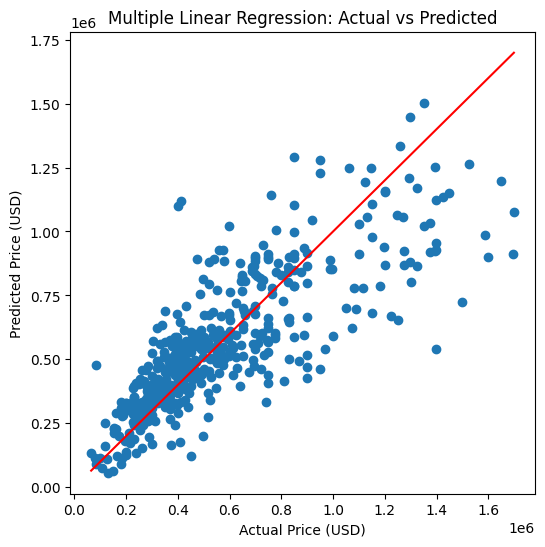

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_multi)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()


In [29]:
df['TotalRooms'] = df['Beds'] + df['Baths']


In [30]:
from sklearn.linear_model import Ridge

# Create a Ridge model
ridge = Ridge(alpha=1.0)  # alpha=1.0 is default regularization strength
ridge.fit(X_train, y_train)  # Fit model to training data


Ridge()

In [31]:
# Predict house prices on the test set
y_pred_ridge = ridge.predict(X_test)


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R^2 Score: {r2_ridge}")


Ridge Regression MSE: 37219668893.406784
Ridge Regression R^2 Score: 0.6465199400356112


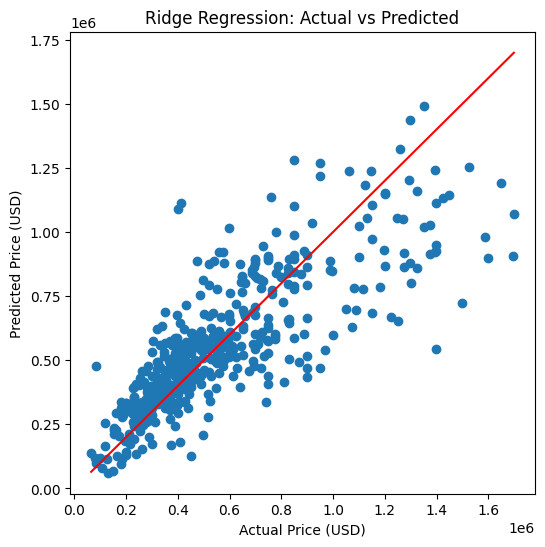

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_ridge)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()
